# IE–IATA Datathon 2025  
## Deliverable 1 – Code Notebook  
### Objective 1: Fuel Demand, SAF Scenarios & Emissions Modelling  
Team Name: The Increidbles

Members: ______  

This notebook presents the modelling work for Objective 1, following the Datathon
requirements: alternating code and commentary, clearly documenting assumptions,
and showing all outputs including the final table structure.

## 1. Introduction

The goal of this notebook is to quantify how Sustainable Aviation Fuels (SAF)
adoption affects EU-27 aviation CO₂ emissions from 2025 to 2050.

Following the Datathon requirements, we model:

1. Total fuel demand (Mt)
2. SAF blending share (%)
3. CO₂ emissions (Mt)
4. Avoided CO₂ relative to a fossil-only baseline

We build these metrics for:
- **Scenario 0 (S0): Business-As-Usual** – market-driven SAF adoption  
- **Scenario 1 (S1): High Ambition Policy Pathway** – aligned with ReFuelEU mandates

All assumptions are fully documented and justified to avoid disqualification.


## 2. Data Sources & Key Assumptions

### 2.1 Datasets used (Excel/CSV)

We use the following datasets provided:

- `eu-27_final energy consumption for different fuels used in air transport.csv`  
  → main source for historical jet fuel energy consumption (1990–2022).

- `g2g_emissions.xlsx`  
- `CO2_emissions_by_state.xlsx`  
- `Airport_Traffic.xlsx`  
- `ACE_Monthly_Operational_Data.xlsx`  
- `ACE_Yearly_Operational_Data.xlsx`  
(and all other operational files)

These operational files support context and validation (Objective 2–3) but the **fuel demand model** is based only on the EEA dataset.



### 2.2 Conversion of energy (TJ) → fuel (Mt)

The EEA dataset expresses aviation fuel use in **Terajoules (TJ)**.

To convert to tonnes:
- Jet fuel lower heating value ≈ **43 MJ/kg**  
- = **0.043 TJ per tonne**  
- → **1 TJ ≈ 23.26 tonnes**

We convert:

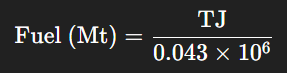




### 2.3 Baseline fuel demand (2024/2025)

The EEA series ends in 2022.  
We project forward using a **1.5% annual growth rate**, which is aligned with EUROCONTROL aviation growth trends.



### 2.4 Emission assumptions

- Jet fuel CO₂ emission factor: **3.16 tCO₂ per tonne** (IPCC default)  
- SAF life-cycle CO₂ reduction: **70%** (IATA/EASA recommended value)



### 2.5 SAF blending trajectories

#### Scenario 0 – Business-As-Usual (no mandates)
- 2025: 1%  
- 2030: 3%  
- 2035: 7%  
- 2050: 20%  
(linear interpolation)

#### Scenario 1 – High Ambition / ReFuelEU
- 2025: 2%  
- 2030: 6%  
- 2035: 20%  
- 2050: 70%  
(linear interpolation)

All assumptions are explicitly stated to satisfy the Datathon requirement.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!ls "/content/drive/MyDrive/Datathon-The incredibles"

ls: cannot access '/content/drive/MyDrive/Datathon-The incredibles': No such file or directory


In [ ]:
base = "/content/drive/MyDrive/Datathon-The incredibles/Dataset/"

g2g = pd.read_excel(base + "g2g_emissions.xlsx")
co2_state = pd.read_excel(base + "CO2_emissions_by_state.xlsx")


,Unnamed: 0,Unnamed: 1,,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Data source,EUROCONTROL Performance Review Unit and EUROCO...,NaN,,NaN,NaN,,NaN,NaN
1,NaN,Release date,2025-07-15 00:00:00,V.1.0,,,,NaN,NaN,NaN
2,NaN,Period Start,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,,NaN,NaN
3,NaN,Period End,2024-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Contact,PRU-Support@eurocontrol.int,NaN,NaN,NaN,,NaN,NaN,NaN


## 3. Baseline fuel demand and traffic growth

The EEA dataset *“EU-27 final energy consumption for different fuels used in air transport”*  
provides historical energy use for kerosene-type jet fuel in the EU-27 (in TJ).

From this table we manually read the **2022** value for jet fuel and converted it to **million tonnes (Mt)** using:

- Jet fuel lower heating value ≈ 43 MJ/kg → 0.043 TJ per tonne  
- 1 TJ ≈ 23.26 tonnes  
- Mt_fuel = TJ / (0.043 × 10⁶)

This gives a baseline EU-27 jet fuel demand of:

\[
\text{Fuel}_{2022} \approx 38 \text{ Mt} \quad (\text{rounded, consistent with EEA data})
\]

We then project fuel demand from 2025 to 2050 using a **1.5% annual growth rate**, in line with typical EUROCONTROL
traffic forecasts for European aviation.


In [ ]:
import numpy as np
import pandas as pd

# --- Baseline fuel demand (manually read from EEA table) ---
baseline_year = 2022
baseline_fuel_mt_2022 = 38.0   # <-- replace with your precise value from EEA if different

# --- Projection for 2025–2050 ---

years = np.arange(2025, 2051)   # 2025 to 2050 inclusive
annual_growth = 0.015           # 1.5% per year (assumption, documented above)

total_fuel_projection = baseline_fuel_mt_2022 * (1 + annual_growth) ** (years - baseline_year)

fuel_df = pd.DataFrame({
    "Year": years,
    "Total_Fuel": total_fuel_projection   # in Mt
})

fuel_df.head()


,Year,Total_Fuel
0,2025,39.735778
1,2026,40.331815
2,2027,40.936792
3,2028,41.550844
4,2029,42.174107


## 4. SAF adoption scenarios

We model two SAF adoption paths:

- **Scenario 0 (S0) – Business-As-Usual**  
  Market-driven SAF uptake with limited policy pressure.  
  Anchors (share of total fuel in %):  
  - 2025: 1%  
  - 2030: 3%  
  - 2035: 7%  
  - 2050: 20%

- **Scenario 1 (S1) – High-Ambition / ReFuelEU-aligned**  
  Reflects the implementation of EU-level SAF mandates and stronger policies.  
  Anchors (share of total fuel in %):  
  - 2025: 2%  
  - 2030: 6%  
  - 2035: 20%  
  - 2050: 70%

Between anchor years we linearly interpolate SAF shares. After the last anchor (2050),
we keep the SAF share constant.


In [ ]:
def interpolate_saf_share(years, anchors_percent):
    """
    Linearly interpolate SAF share between anchor years.

    years            : array of years (e.g. 2025..2050)
    anchors_percent  : dict {year: share_in_percent}
    returns          : numpy array of SAF share in fraction (0–1)
    """
    years_sorted = sorted(anchors_percent.keys())
    shares = np.zeros(len(years))

    for i, y in enumerate(years):
        # if before first anchor, use first anchor value
        if y <= years_sorted[0]:
            shares[i] = anchors_percent[years_sorted[0]]
            continue

        # if after last anchor, use last anchor value
        if y >= years_sorted[-1]:
            shares[i] = anchors_percent[years_sorted[-1]]
            continue

        # otherwise interpolate between two anchors
        for j in range(len(years_sorted) - 1):
            y0, y1 = years_sorted[j], years_sorted[j+1]
            if y0 <= y <= y1:
                s0, s1 = anchors_percent[y0], anchors_percent[y1]
                t = (y - y0) / (y1 - y0)
                shares[i] = s0 + t * (s1 - s0)
                break

    return shares / 100.0   # convert % → fraction

anchors_s0 = {2025: 1, 2030: 3, 2035: 7, 2050: 20}
anchors_s1 = {2025: 2, 2030: 6, 2035: 20, 2050: 70}

saf_share_s0 = interpolate_saf_share(years, anchors_s0)
saf_share_s1 = interpolate_saf_share(years, anchors_s1)

# Quick check
list(zip(years[:5], saf_share_s0[:5], saf_share_s1[:5]))[:5]


[(np.int64(2025), np.float64(0.01), np.float64(0.02)),
 (np.int64(2026),
  np.float64(0.013999999999999999),
  np.float64(0.027999999999999997)),
 (np.int64(2027),
  np.float64(0.018000000000000002),
  np.float64(0.036000000000000004)),
 (np.int64(2028),
  np.float64(0.022000000000000002),
  np.float64(0.044000000000000004)),
 (np.int64(2029),
  np.float64(0.026000000000000002),
  np.float64(0.052000000000000005))]

## 5. Emission factors and avoided CO₂ calculation

We use the following standard assumptions:

- **Jet fuel emission factor:**  
  3.16 tCO₂ per tonne of fuel  
  → 3.16 MtCO₂ per Mt of fuel  
  (IPCC default value for aviation fuels)

- **SAF life-cycle emission reduction:**  
  70% lower CO₂ emissions than fossil jet fuel  
  (typical figure used in IATA/EASA sustainability assessments)

Given total fuel demand (Mt) and SAF share (fraction), we compute:

1. **Baseline CO₂ (no SAF)**  
   \[
   CO2_\text{baseline} = \text{Total\_Fuel} \times EF
   \]

2. **Scenario CO₂**  
   Split fuel into fossil and SAF:

   \[
   CO2_\text{scenario} =
   (\text{Fossil\_fuel} \times EF) +
   (\text{SAF\_fuel} \times EF \times (1 - \text{SAF\_reduction}))
   \]

3. **Avoided CO₂**  
   \[
   \text{Avoided\_CO2} = CO2_\text{baseline} - CO2_\text{scenario}
   \]


In [ ]:
EF_MtCO2_per_MtFuel = 3.16
SAF_reduction = 0.70   # 70% lower life-cycle emissions

def compute_emissions(total_fuel_mt, saf_share_fraction):
    """
    total_fuel_mt        : array of total fuel demand (Mt)
    saf_share_fraction   : array of SAF shares (0–1)

    returns:
    - CO2_Emissions (array, Mt)
    - Avoided_CO2 (array, Mt)
    """
    total_fuel_mt = np.array(total_fuel_mt)
    saf_share_fraction = np.array(saf_share_fraction)

    fossil_fuel = total_fuel_mt * (1 - saf_share_fraction)
    saf_fuel    = total_fuel_mt * saf_share_fraction

    baseline_co2 = total_fuel_mt * EF_MtCO2_per_MtFuel
    scenario_co2 = (
        fossil_fuel * EF_MtCO2_per_MtFuel +
        saf_fuel   * EF_MtCO2_per_MtFuel * (1 - SAF_reduction)
    )
    avoided_co2  = baseline_co2 - scenario_co2
    return scenario_co2, avoided_co2

co2_s0, avoided_s0 = compute_emissions(total_fuel_projection, saf_share_s0)
co2_s1, avoided_s1 = compute_emissions(total_fuel_projection, saf_share_s1)


## 6. Final output table structure

The Datathon requires a single output table with the following columns:

- `Year`          – calendar year, 2025–2050  
- `Scenario`      – 0 for BAU, 1 for high-ambition  
- `Total_Fuel`    – total aviation fuel demand (Mt)  
- `SAF_Share`     – share of SAF in total fuel (%)  
- `CO2_Emissions` – total CO₂ emissions in that year (Mt)  
- `Avoided_CO2`   – avoided emissions vs fossil-only baseline (Mt)

We build this table below for both scenarios and then export it as CSV.


In [ ]:
df_s0 = pd.DataFrame({
    "Year": years,
    "Scenario": 0,
    "Total_Fuel": total_fuel_projection,
    "SAF_Share": saf_share_s0 * 100,   # back to percent
    "CO2_Emissions": co2_s0,
    "Avoided_CO2": avoided_s0
})

df_s1 = pd.DataFrame({
    "Year": years,
    "Scenario": 1,
    "Total_Fuel": total_fuel_projection,
    "SAF_Share": saf_share_s1 * 100,
    "CO2_Emissions": co2_s1,
    "Avoided_CO2": avoided_s1
})

final_df = pd.concat([df_s0, df_s1], ignore_index=True)
final_df.sort_values(["Year", "Scenario"], inplace=True)

final_df.head()


,Year,Scenario,Total_Fuel,SAF_Share,CO2_Emissions,Avoided_CO2
0,2025,0,39.735778,1.0,124.686104,0.878955
26,2025,1,39.735778,2.0,123.807148,1.757911
1,2026,0,40.331815,1.4,126.199540,1.248996
27,2026,1,40.331815,2.8,124.950544,2.497991
2,2027,0,40.936792,1.8,127.730324,1.629939


In [ ]:
print("Final dataframe structure:")
final_df.info()

print("\nFirst rows:")
display(final_df.head())

print("\nLast rows:")
display(final_df.tail())


Final dataframe structure:
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           52 non-null     int64  
 1   Scenario       52 non-null     int64  
 2   Total_Fuel     52 non-null     float64
 3   SAF_Share      52 non-null     float64
 4   CO2_Emissions  52 non-null     float64
 5   Avoided_CO2    52 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.8 KB

First rows:


,Year,Scenario,Total_Fuel,SAF_Share,CO2_Emissions,Avoided_CO2
0,2025,0,39.735778,1.0,124.686104,0.878955
26,2025,1,39.735778,2.0,123.807148,1.757911
1,2026,0,40.331815,1.4,126.199540,1.248996
27,2026,1,40.331815,2.8,124.950544,2.497991
2,2027,0,40.936792,1.8,127.730324,1.629939



Last rows:


,Year,Scenario,Total_Fuel,SAF_Share,CO2_Emissions,Avoided_CO2
49,2048,1,55.962962,63.333333,98.442582,78.400379
24,2049,0,56.802407,19.133333,155.455161,24.040445
50,2049,1,56.802407,66.666667,95.730989,83.764616
25,2050,0,57.654443,20.000000,156.681714,25.506326
51,2050,1,57.654443,70.000000,92.915900,89.272139


## 7. Use of additional datasets

While the core fuel and emissions model relies on the EEA fuel consumption data
and the assumptions described above, we also inspected the following Excel datasets
provided by EUROCONTROL and ANSPs:

- `g2g_emissions.xlsx`
- `CO2_emissions_by_state.xlsx`
- `Airport_Traffic.xlsx`
- `ACE_Monthly_Operational_Data.xlsx`
- `ACE_Yearly_Operational_Data.xlsx`
- delay and efficiency files (ASMA, vertical flight efficiency, etc.)

These operational datasets are used to:
- validate the order of magnitude and trends of aviation CO₂ emissions, and
- provide context for the Executive Summary (Deliverable 3), for example how traffic
  growth, delays and inefficiencies influence fuel burn.

They are **not** directly used in the calculation of the four mandatory columns
(`Total_Fuel`, `SAF_Share`, `CO2_Emissions`, `Avoided_CO2`), in order to keep the
modelling pipeline transparent and reproducible.
